<img src = "images\outline.gif">

# Descriptive Text Analytics
- Unstructured data refers to "texts" in your data (e.g., documents, customer/product reviews, tweets, facebook posts)
- Many different techniques are available for text (or content) analytics (from simple to advanced)
- Simple: word frequency ... word cloud ... application of descriptive analytics to texts
- Advanced: classification, sentiment analysis, clustering, topic modeling, ...

## Descriptive text analytics, first

In [1]:
# import nltk (natural language tool kit), a popular python package for text mining
import nltk
# stopwords, FreqDist, word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
#regular expression
import re
#csv
import csv
# Excel-like format
import pandas as pd
#data visualization
import matplotlib.pyplot as plt
% matplotlib inline

# Reading data as list

In [2]:
review = []
openfile = open('data/sampledata_wordfrequency.csv', 'rb')
r = csv.reader(openfile)
for i in r:
# get the first column only (ignoring the second column)
    review.append(i)    
openfile.close()

print review

[['I love this sandwich.'], ['this is an amazing place!'], ['I feel very good about these beers.'], ['this is my best work.'], ['what an awesome view'], ['I do not like this restaurant'], ['I am tired of this stuff.'], ['I cant deal with this'], ['he is my sworn enemy!'], ['my boss is horrible.'], ['the beer was good.'], ['I do not enjoy my job'], ['I aint feeling dandy today.'], ['I feel amazing!'], ['Gary is a friend of mine.'], ['I cant believe Im doing this.']]


## Let's study each step necessary for word frequency analysis

Data/Text Preprocessing (Data Wrangling) for Content Analytics (or Text Analytics)

This step, which is extremely critical for text analytics, involves several data transformation and manipulation activities to prepare the dataset for predictive analytics (e.g., training predictive or machine learning model). Specifically,

1. **tokenization** : breaking sentences and documents to tokens (individual words or terms)
2. **transforming case** : converting tokens (or words) to lower case
3. **removing stopwords** : removing less informative words or tokens from the dataset
4. **ngram** : finding informative phrases consisting of two words or more 
5. **stemming or lemmatization**: finding 

In [3]:
# currently the data are in list ... convert to string
tokens = str(review)
#lowecases
tokens = tokens.lower()
# Remove useless numbers and alphanumerical words
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
#tokenization or word split
tokens = word_tokenize(tokens)
#Remove stopwords
tokens = (word for word in tokens if word not in stopwords.words('english'))
# Filter non-alphanumeric characters from tokens
tokens = (word for word in tokens if word.isalpha())
#remove short words
tokens = (word for word in tokens if len(word) >= 3)
#Create your bigrams ... bigrams are two tokens
#bgs = nltk.bigrams(tokens)

# Word Frequency

In [4]:
#compute frequency distribution for all the bigrams in the text
fdist = nltk.FreqDist(tokens)
fdist

FreqDist({'aint': 1,
          'amazing': 2,
          'awesome': 1,
          'beer': 1,
          'beers': 1,
          'believe': 1,
          'best': 1,
          'boss': 1,
          'cant': 2,
          'dandy': 1,
          'deal': 1,
          'enemy': 1,
          'enjoy': 1,
          'feel': 2,
          'feeling': 1,
          'friend': 1,
          'gary': 1,
          'good': 2,
          'horrible': 1,
          'job': 1,
          'like': 1,
          'love': 1,
          'mine': 1,
          'place': 1,
          'restaurant': 1,
          'sandwich': 1,
          'stuff': 1,
          'sworn': 1,
          'tired': 1,
          'today': 1,
          'view': 1,
          'work': 1})

In [7]:
fdist.most_common(20)

[('feel', 2),
 ('cant', 2),
 ('good', 2),
 ('amazing', 2),
 ('enjoy', 1),
 ('love', 1),
 ('deal', 1),
 ('tired', 1),
 ('awesome', 1),
 ('mine', 1),
 ('gary', 1),
 ('best', 1),
 ('aint', 1),
 ('beer', 1),
 ('horrible', 1),
 ('sworn', 1),
 ('today', 1),
 ('dandy', 1),
 ('sandwich', 1),
 ('boss', 1)]

## Additional Text Preprocessing (if needed)

- stemming / lemmatize: changes "dogs" to "dog"
- you can add additional stopwords, depending on business contexts (e.g., also, cant, aint)

In [8]:
review = []
openfile = open('data/sampledata_wordfrequency.csv', 'rb')
r = csv.reader(openfile)
for i in r:
# get the first column only (ignoring the second column)
    review.append(i)    
openfile.close()

# what if you have additional stopwords to be removed
tokens = str(review)
#lowecases
tokens = tokens.lower()
# Remove useless numbers and alphanumerical words
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
#tokenization or word split
tokens = word_tokenize(tokens)
#get stemming words or lemmas
wordnet_lemmatizer = WordNetLemmatizer()
tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)
#additional stopwrods
more_stopwords = set(('cant', 'aint', 'today'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
# Filter non-alphanumeric characters from tokens
tokens = (word for word in tokens if word.isalpha())
#remove short words
tokens = (word for word in tokens if len(word) >= 3)

fdist = nltk.FreqDist(tokens)
fdist

FreqDist({'amazing': 2,
          'awesome': 1,
          u'beer': 2,
          'believe': 1,
          'best': 1,
          u'bos': 1,
          'dandy': 1,
          'deal': 1,
          'enemy': 1,
          'enjoy': 1,
          'feel': 2,
          'feeling': 1,
          'friend': 1,
          'gary': 1,
          'good': 2,
          'horrible': 1,
          'job': 1,
          'like': 1,
          'love': 1,
          'mine': 1,
          'place': 1,
          'restaurant': 1,
          'sandwich': 1,
          'stuff': 1,
          'sworn': 1,
          'tired': 1,
          'view': 1,
          'work': 1})

## Appendix: Word Frequency Analysis

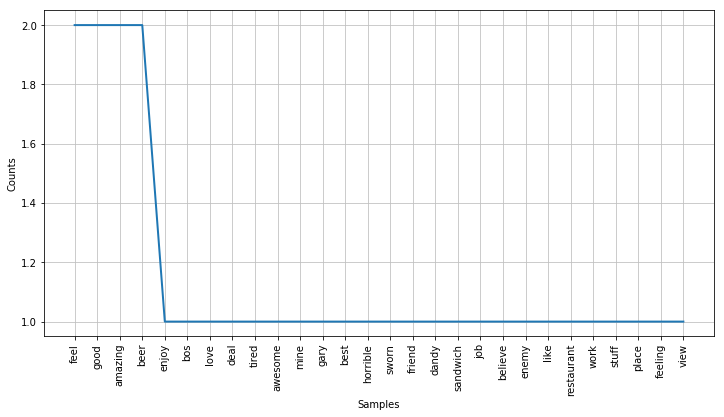

In [9]:
plt.figure(figsize=(12,6))
fdist.plot(50)

### Saving the word frequency analysis

In [10]:
# save the results of word frequency
output = open("data/output_fdist.csv", "wb") 
w = csv.writer(output)
w.writerows(fdist.items())
output.close()

# Word Frequency Analysis - Bigrams

* a list of word pairs

In [11]:
# what if you have additional stopwords to be removed
tokens = str(review)
#lowecases
tokens = tokens.lower()
# Remove useless numbers and alphanumerical words
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
#tokenization or word split
tokens = word_tokenize(tokens)
#get stemming words or lemmas
wordnet_lemmatizer = WordNetLemmatizer()
tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)
#additional stopwrods
more_stopwords = set(('cant', 'aint', 'today'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
# Filter non-alphanumeric characters from tokens
tokens = (word for word in tokens if word.isalpha())
#remove short words
tokens = (word for word in tokens if len(word) >= 3)
#Create your bigrams ... a bigram are a pair of two tokens
bigrams = nltk.bigrams(tokens)
#compute frequency distribution for all the bigrams in the text
fdist_bi = nltk.FreqDist(bigrams)
fdist_bi

FreqDist({('amazing', 'gary'): 1,
          ('amazing', 'place'): 1,
          ('awesome', 'view'): 1,
          (u'beer', 'best'): 1,
          ('beer', 'good'): 1,
          ('best', 'work'): 1,
          (u'bos', 'horrible'): 1,
          ('dandy', 'feel'): 1,
          ('deal', 'sworn'): 1,
          ('enemy', u'bos'): 1,
          ('enjoy', 'job'): 1,
          ('feel', 'amazing'): 1,
          ('feel', 'good'): 1,
          ('feeling', 'dandy'): 1,
          ('friend', 'mine'): 1,
          ('gary', 'friend'): 1,
          ('good', u'beer'): 1,
          ('good', 'enjoy'): 1,
          ('horrible', 'beer'): 1,
          ('job', 'feeling'): 1,
          ('like', 'restaurant'): 1,
          ('love', 'sandwich'): 1,
          ('mine', 'believe'): 1,
          ('place', 'feel'): 1,
          ('restaurant', 'tired'): 1,
          ('sandwich', 'amazing'): 1,
          ('stuff', 'deal'): 1,
          ('sworn', 'enemy'): 1,
          ('tired', 'stuff'): 1,
          ('view', 'like'): 1,


In [12]:
# save the results of word frequency
output = open("data/output_fdist_bigram.csv", "wb") 
w = csv.writer(output)
w.writerows(fdist_bi.items())
output.close()

You can perform further descriptive analysis using Tableau, Excel, and Python.

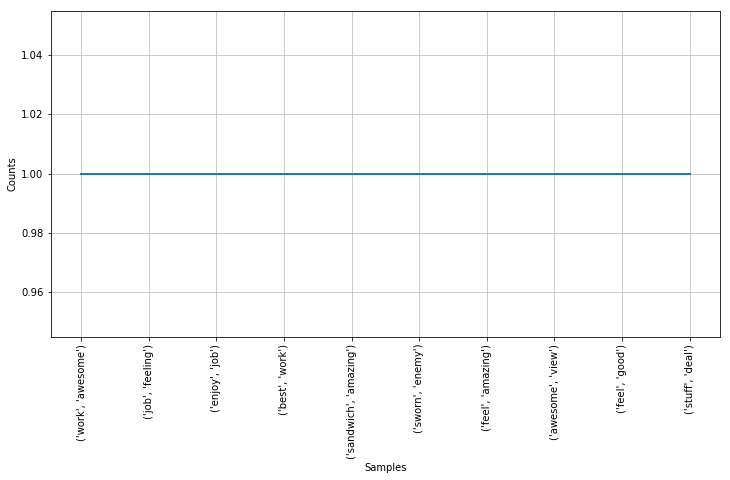

In [13]:
# plot word frequency using bigram
plt.figure(figsize=(12,6))
fdist_bi.plot(10)

# Exercise: Perform word frequency analysis on Politics RSS feed dataset

- politics.csv

In [34]:
review = []
openfile = open('data/politics.csv', 'rb')
r = csv.reader(openfile)
for i in r:
# get the first column only (ignoring the second column)
    review.append(i)    
openfile.close()

# what if you have additional stopwords to be removed
tokens = str(review)
#lowecases
tokens = tokens.lower()
# Remove useless numbers and alphanumerical words
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
#tokenization or word split
tokens = word_tokenize(tokens)
#get stemming words or lemmas
wordnet_lemmatizer = WordNetLemmatizer()
tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)
#additional stopwrods
more_stopwords = set(('cant', 'aint', 'today'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
# Filter non-alphanumeric characters from tokens
tokens = (word for word in tokens if word.isalpha())
#remove short words
tokens = (word for word in tokens if len(word) >= 3)
#Create your bigrams ... a bigram are a pair of two tokens
bigrams = nltk.bigrams(tokens)
#compute frequency distribution for all the bigrams in the text
f = nltk.FreqDist(bigrams)















In [33]:
# answer the following questions

# Q1. how many rows are in the politics folder
count = len(open(r"data/politics.csv", 'rU').readlines())
print count
    

# Q2. What are the most popular words

    
    




1


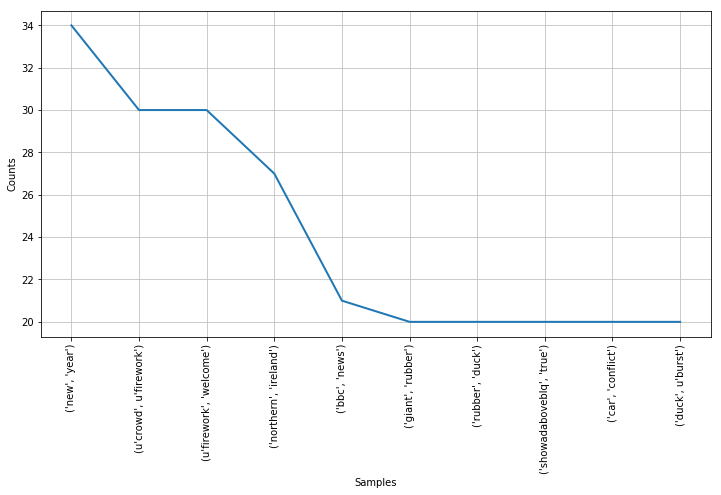

In [16]:
# plot (top 50 words only)
plt.figure(figsize=(12,6))
f.plot(10)


# Appendix 1

## Putting the frequency results in data frame (Excel-like)

In [17]:
fdist.most_common(20)
for k,v in fdist.items():
    print k,v

enjoy 1
bos 1
love 1
deal 1
tired 1
feel 2
awesome 1
mine 1
good 2
gary 1
best 1
amazing 2
beer 2
horrible 1
sworn 1
friend 1
dandy 1
sandwich 1
job 1
believe 1
enemy 1
like 1
restaurant 1
work 1
stuff 1
place 1
feeling 1
view 1


In [18]:
# prepare the results of word frequency on auto data as a list

freq_word = []

# two values or columns in fdist_a
for k,v in fdist.items():
    freq_word.append([k,v])
    print  freq_word

#make it like an Excel worksheet
wordlist = pd.DataFrame(freq_word)

wordlist

[['enjoy', 1]]
[['enjoy', 1], [u'bos', 1]]
[['enjoy', 1], [u'bos', 1], ['love', 1]]
[['enjoy', 1], [u'bos', 1], ['love', 1], ['deal', 1]]
[['enjoy', 1], [u'bos', 1], ['love', 1], ['deal', 1], ['tired', 1]]
[['enjoy', 1], [u'bos', 1], ['love', 1], ['deal', 1], ['tired', 1], ['feel', 2]]
[['enjoy', 1], [u'bos', 1], ['love', 1], ['deal', 1], ['tired', 1], ['feel', 2], ['awesome', 1]]
[['enjoy', 1], [u'bos', 1], ['love', 1], ['deal', 1], ['tired', 1], ['feel', 2], ['awesome', 1], ['mine', 1]]
[['enjoy', 1], [u'bos', 1], ['love', 1], ['deal', 1], ['tired', 1], ['feel', 2], ['awesome', 1], ['mine', 1], ['good', 2]]
[['enjoy', 1], [u'bos', 1], ['love', 1], ['deal', 1], ['tired', 1], ['feel', 2], ['awesome', 1], ['mine', 1], ['good', 2], ['gary', 1]]
[['enjoy', 1], [u'bos', 1], ['love', 1], ['deal', 1], ['tired', 1], ['feel', 2], ['awesome', 1], ['mine', 1], ['good', 2], ['gary', 1], ['best', 1]]
[['enjoy', 1], [u'bos', 1], ['love', 1], ['deal', 1], ['tired', 1], ['feel', 2], ['awesome', 1], [

,0,1
0,enjoy,1
1,bos,1
2,love,1
3,deal,1
4,tired,1
5,feel,2
6,awesome,1
7,mine,1
8,good,2
9,gary,1


In [19]:
# rename column names

#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html
wordlist = wordlist.rename(columns={0: 'word', 1: 'freq'})
wordlist.to_csv("data/worldlist.csv")

In [20]:
# You can create a csv file for further analysis using Tabular, Excel, etc.

# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html

wordlist.to_csv('data/output_wordlist.csv')

You can perform further descriptive analysis using Tableau, Excel, and Python.

# Appendix 2

In [21]:
review = []
openfile = open('data/sampledata_wordfrequency.csv', 'rb')
r = csv.reader(openfile)
for i in r:
# get the first column only (ignoring the second column)
    review.append(i)    
openfile.close()

In [22]:
# currently the data are in list ... convert to string. 
# even though there are 10 customer reviews, we will treat it as a single large document
tokens = str(review)
tokens

"[['I love this sandwich.'], ['this is an amazing place!'], ['I feel very good about these beers.'], ['this is my best work.'], ['what an awesome view'], ['I do not like this restaurant'], ['I am tired of this stuff.'], ['I cant deal with this'], ['he is my sworn enemy!'], ['my boss is horrible.'], ['the beer was good.'], ['I do not enjoy my job'], ['I aint feeling dandy today.'], ['I feel amazing!'], ['Gary is a friend of mine.'], ['I cant believe Im doing this.']]"

In [23]:
# lowecases for content analytics ... we assume, for example, LOVE is sames love 
tokens = tokens.lower()
tokens

"[['i love this sandwich.'], ['this is an amazing place!'], ['i feel very good about these beers.'], ['this is my best work.'], ['what an awesome view'], ['i do not like this restaurant'], ['i am tired of this stuff.'], ['i cant deal with this'], ['he is my sworn enemy!'], ['my boss is horrible.'], ['the beer was good.'], ['i do not enjoy my job'], ['i aint feeling dandy today.'], ['i feel amazing!'], ['gary is a friend of mine.'], ['i cant believe im doing this.']]"

In [24]:
# the dataset contains useless characters and numbers
# Remove useless numbers and alphanumerical words
# use regular expression ... a-zA-Z0-9 refers to all English characters (lowercase & uppercase) and numbers
# ^a-zA-Z0-9 is opposite of a-zA-Z0-9
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
tokens

'   i love this sandwich       this is an amazing place       i feel very good about these beers       this is my best work       what an awesome view      i do not like this restaurant      i am tired of this stuff       i cant deal with this      he is my sworn enemy       my boss is horrible       the beer was good       i do not enjoy my job      i aint feeling dandy today       i feel amazing       gary is a friend of mine       i cant believe im doing this    '

In [25]:
#tokenization or word split
tokens = word_tokenize(tokens)
print tokens

['i', 'love', 'this', 'sandwich', 'this', 'is', 'an', 'amazing', 'place', 'i', 'feel', 'very', 'good', 'about', 'these', 'beers', 'this', 'is', 'my', 'best', 'work', 'what', 'an', 'awesome', 'view', 'i', 'do', 'not', 'like', 'this', 'restaurant', 'i', 'am', 'tired', 'of', 'this', 'stuff', 'i', 'cant', 'deal', 'with', 'this', 'he', 'is', 'my', 'sworn', 'enemy', 'my', 'boss', 'is', 'horrible', 'the', 'beer', 'was', 'good', 'i', 'do', 'not', 'enjoy', 'my', 'job', 'i', 'aint', 'feeling', 'dandy', 'today', 'i', 'feel', 'amazing', 'gary', 'is', 'a', 'friend', 'of', 'mine', 'i', 'cant', 'believe', 'im', 'doing', 'this']


In [26]:
# stopwords are common words (e.g., this, that, of, for), which are not meaningful in analysis
# NLTK offers a list of stopwords we can use in our analysis
print stopwords.words('english')

[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u'her', u'hers', u'herself', u'it', u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'which', u'who', u'whom', u'this', u'that', u'these', u'those', u'am', u'is', u'are', u'was', u'were', u'be', u'been', u'being', u'have', u'has', u'had', u'having', u'do', u'does', u'did', u'doing', u'a', u'an', u'the', u'and', u'but', u'if', u'or', u'because', u'as', u'until', u'while', u'of', u'at', u'by', u'for', u'with', u'about', u'against', u'between', u'into', u'through', u'during', u'before', u'after', u'above', u'below', u'to', u'from', u'up', u'down', u'in', u'out', u'on', u'off', u'over', u'under', u'again', u'further', u'then', u'once', u'here', u'there', u'when', u'where', u'why', u'how', u'all', u'any', u'both', u'each', u'few', u'more', u'most', u'other', u'some', u'such', u'no', u'nor', u

In [27]:
# remove stopwords 
# stopwords are common words (e.g., this, that, of, for), which are not meaningful in analysis
for i in tokens:
    # collect those words, which are not in the stopword list
    if i not in stopwords.words('english'):
        print i

love
sandwich
amazing
place
feel
good
beers
best
work
awesome
view
like
restaurant
tired
stuff
cant
deal
sworn
enemy
boss
horrible
beer
good
enjoy
job
aint
feeling
dandy
today
feel
amazing
gary
friend
mine
cant
believe
im


In [28]:
# save those meaningful words
tokens = [ i for i in tokens if i not in stopwords.words('english')]

In [29]:
# sometimes you want to remove short words
for i in tokens:
    if len(i) >= 3:
        print i

love
sandwich
amazing
place
feel
good
beers
best
work
awesome
view
like
restaurant
tired
stuff
cant
deal
sworn
enemy
boss
horrible
beer
good
enjoy
job
aint
feeling
dandy
today
feel
amazing
gary
friend
mine
cant
believe


In [30]:
# saving all the words more than 3 words
tokens = ( i for i in tokens if len(i) >= 3 )
tokens

<generator object <genexpr> at 0x11e6281e0>

In [31]:
# Filter non-alphabetic tokens or words from corpus
tokens = ( word for word in tokens if word.isalpha() )
tokens

<generator object <genexpr> at 0x11e6280f0>